# SOM

O objetivo é treinar um modelo não supervisionado para visualizar o perfil dos alunos de LoP com base nas suas notas. Será que se o aluno tirar uma nota baixa na primeira unidade, o seu desempenho será ruim nas outras duas? Haverá casos em que ele conseguirá se recuperar e passará na disciplina?

In [2]:
import pandas as pd
import numpy as np

## Carregamento de dados

In [72]:
dataset =  pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/perfil_notas_sem_identificacao_col_resum.csv")
dataset.head()

,Unid. 1,Unid. 2,Unid. 3,Resultado,Sit.,op_aritmetico,if,op_logico,while,vetor,dev_jogos,html,css,p5js,cpp,java,javascript,python,Você tem acesso regular a um ambiente computacional no qual possa programar durante a disciplina?,Quanto tempo você disponível para estudar para disciplina por semana? (Em horas),interesse_em_programacao,seu_ensino_medio
0,9.6,9.1,6.8,8.5,APR,1.0,1,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sim,15.0,10,Ensino médio convencional público
1,9.7,8.5,7.3,8.5,APR,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sim,20.0,8,Técnica pública
2,10.0,8.0,0.7,6.2,REC,3.0,3,3.0,3,3.0,1.0,3,3.0,0.0,3.0,3.0,3.0,3.0,Sim,40.0,9,Ensino médio convencional particular
3,0.2,0.0,0.0,0.1,REP,1.0,3,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,Sim,10.0,8,Ensino médio convencional particular
4,9.5,8.3,6.3,8.0,APR,3.0,3,3.0,3,1.0,0.0,1,0.0,0.0,3.0,0.0,1.0,0.0,Sim,10.0,10,Ensino médio convencional público


In [73]:
#dataset.drop(columns=['Unid. 1', 'Unid. 2', 'Unid. 3', 'Resultado', 'Sit.', 'seu_ensino_medio', 'Você tem acesso regular a um ambiente computacional no qual possa programar durante a disciplina?' ], inplace=True)
data = dataset.iloc[:, 0:4]
data.head()

,Unid. 1,Unid. 2,Unid. 3,Resultado
0,9.6,9.1,6.8,8.5
1,9.7,8.5,7.3,8.5
2,10.0,8.0,0.7,6.2
3,0.2,0.0,0.0,0.1
4,9.5,8.3,6.3,8.0


## Tratamento de dados

## Treinamento

In [74]:
!pip install minisom

In [76]:
X_train = data.iloc[:, 0:4].values 
[row, col] = X_train.shape

print(X_train[0,:])
print (row," ",col)

[9.6 9.1 6.8 8.5]
181   4


In [88]:
# Training the SOM
tamanhoXdaRede = 4; 
tamanhoYdaRede = 4; 

quantidadeCaracteristicas = col

from minisom import MiniSom
som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = quantidadeCaracteristicas, sigma = 1.0, learning_rate = 0.4)
som.pca_weights_init(X_train)

In [89]:
som.train_random(data = X_train, num_iteration = 800000)

## Visualização do treinamento

In [90]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()
print(len(pesos))

4


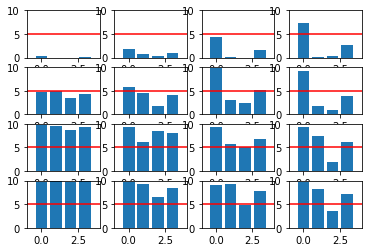

In [91]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(quantidadeCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 4, 0, 10])
    plt.bar(x, elem)
    plt.plot([-1,4],[5,5],'r')
plt.show()

In [92]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x= ['Unid. 1', 'Unid. 2', 'Unid. 3', 'Resultado']
  plt.plot([-1,4],[5,5],'r')
  plt.axis([-1, 4, 0, 10])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

In [93]:
data.head()

,Unid. 1,Unid. 2,Unid. 3,Resultado
0,9.6,9.1,6.8,8.5
1,9.7,8.5,7.3,8.5
2,10.0,8.0,0.7,6.2
3,0.2,0.0,0.0,0.1
4,9.5,8.3,6.3,8.0


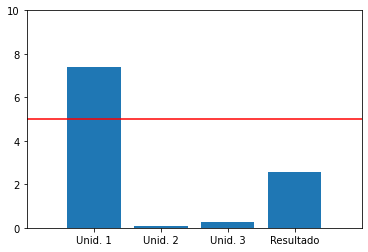

In [95]:
mostraNeuronio(0,3)

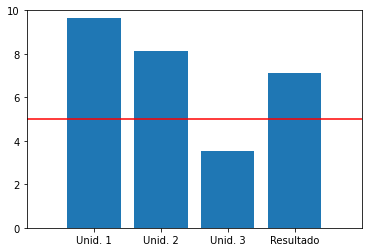

In [98]:
mostraNeuronio(3,3)

## **Consideração final**



In [ ]:
Como podemos ver, o aluno ir bem na primeira unidade não refletirá que ele irá bem nas outras duas e conseguirá passar na disciplina (temos como exemplo o neurônio **(0,3)**). 
Apesar disso, os alunos que tiveram um desempenho baixo na primeira unidade tenderam a ter um desempenho baixo nas outras duas e, com isso, não passaram na disciplina.